In [1]:
#basic librarires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder

#machine learning models
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold

#feature selection
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import r2_score
from sklearn import ensemble

In [2]:
df=pd.read_csv("F:\Capstone\youtube data\cp3.csv")

In [3]:
df.head()

,video_id,trending_date,trending_year,trending_month,trending_date.1,title,channel_title,category_id,publish_time,Year,...,Date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,17,14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,17,...,10,16.658009,13.576525,10.678698,11.743108,False,False,False,6.388561,CA
1,0dBIkQ4Mz1M,17.14.11,17,14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,17,...,10,13.830056,11.758183,7.431892,9.475086,False,False,False,6.558198,CA
2,5qpjK5DgCt4,17.14.11,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,17,...,10,14.975981,11.891608,8.582981,9.009692,False,False,False,7.071573,CA
3,d380meD0W0M,17.14.11,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,17,...,10,14.555460,11.792374,7.595890,9.771041,False,False,False,6.456770,CA
4,2Vv-BfVoq4g,17.14.11,17,14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,17,...,10,17.327761,14.306622,9.956222,11.351206,False,False,False,7.131699,CA


In [25]:
df.dtypes

video_id                   object
trending_date              object
trending_year               int64
trending_month              int64
trending_date.1             int64
title                      object
channel_title              object
category_id                 int64
publish_time               object
Year                      float64
Month                     float64
Date                      float64
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description               float64
country                    object
dtype: object

In [4]:
df=df.drop('trending_date',axis=1)

In [5]:
df=df.drop('publish_time',axis=1)

In [6]:
df.head()

,video_id,trending_year,trending_month,trending_date.1,title,channel_title,category_id,Year,Month,Date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17,14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17,11,10,16.658009,13.576525,10.678698,11.743108,False,False,False,6.388561,CA
1,0dBIkQ4Mz1M,17,14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17,11,10,13.830056,11.758183,7.431892,9.475086,False,False,False,6.558198,CA
2,5qpjK5DgCt4,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,17,11,10,14.975981,11.891608,8.582981,9.009692,False,False,False,7.071573,CA
3,d380meD0W0M,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,17,11,10,14.555460,11.792374,7.595890,9.771041,False,False,False,6.456770,CA
4,2Vv-BfVoq4g,17,14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,17,11,10,17.327761,14.306622,9.956222,11.351206,False,False,False,7.131699,CA


In [9]:
df.corr()

,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_year,1.000000,-0.141726,-0.929136,-0.027638,0.113298,0.093919,0.101044,0.090111,-0.004610,-0.004256,0.013223,0.014410
trending_month,-0.141726,1.000000,0.081918,-0.000630,-0.005169,-0.003467,-0.003867,-0.002208,-0.005545,-0.002049,-0.005353,0.000395
trending_date.1,-0.929136,0.081918,1.000000,0.018549,-0.047928,-0.036826,-0.042394,-0.037813,-0.002704,-0.002490,-0.006461,-0.002719
category_id,-0.027638,-0.000630,0.018549,1.000000,-0.202264,-0.194234,-0.140851,-0.154362,0.036792,0.006015,-0.026140,0.017675
views,0.113298,-0.005169,-0.047928,-0.202264,1.000000,0.818919,0.875235,0.756305,-0.044035,-0.062578,0.015770,0.165667
likes,0.093919,-0.003467,-0.036826,-0.194234,0.818919,1.000000,0.858279,0.849580,-0.192851,-0.389543,0.011761,0.244981
dislikes,0.101044,-0.003867,-0.042394,-0.140851,0.875235,0.858279,1.000000,0.793112,-0.115329,-0.289343,0.012644,0.183728
comment_count,0.090111,-0.002208,-0.037813,-0.154362,0.756305,0.849580,0.793112,1.000000,-0.409932,-0.183709,0.006066,0.209756
comments_disabled,-0.004610,-0.005545,-0.002704,0.036792,-0.044035,-0.192851,-0.115329,-0.409932,1.000000,0.348749,-0.003857,-0.052748
ratings_disabled,-0.004256,-0.002049,-0.002490,0.006015,-0.062578,-0.389543,-0.289343,-0.183709,0.348749,1.000000,-0.002902,-0.065132


In [9]:
df['trending_date'] = df['trending_date'].str.replace('.','-')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17-14-11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,16.658009,13.576525,10.678698,11.743108,False,False,False,6.388561,CA
1,0dBIkQ4Mz1M,17-14-11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,13.830056,11.758183,7.431892,9.475086,False,False,False,6.558198,CA
2,5qpjK5DgCt4,17-14-11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,14.975981,11.891608,8.582981,9.009692,False,False,False,7.071573,CA
3,d380meD0W0M,17-14-11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,14.555460,11.792374,7.595890,9.771041,False,False,False,6.456770,CA
4,2Vv-BfVoq4g,17-14-11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,17.327761,14.306622,9.956222,11.351206,False,False,False,7.131699,CA
5,0yIWz1XEeyc,17-14-11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,14.085309,11.549797,8.436850,9.404590,False,False,False,6.804615,CA
6,_uM5kFfkhB8,17-14-11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,14.910097,12.141347,9.195328,10.189794,False,False,False,7.837160,CA
7,2kyS6SvSYSE,17-14-11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,13.525659,10.960149,7.995644,9.677841,False,False,False,7.252054,CA
8,JzCsM1vtn78,17-14-11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,15.314595,12.587375,8.324579,10.502104,False,False,False,6.618739,CA
9,43sm-QwLcx4,17-14-11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,13.132634,8.327484,6.884487,7.303170,False,False,False,4.330733,CA


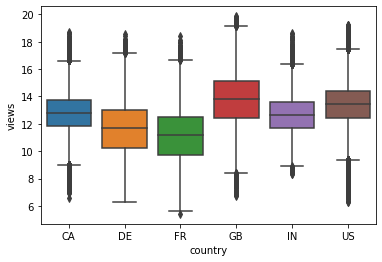

In [7]:
sns.boxplot(x=df['country'],y=df['views'])

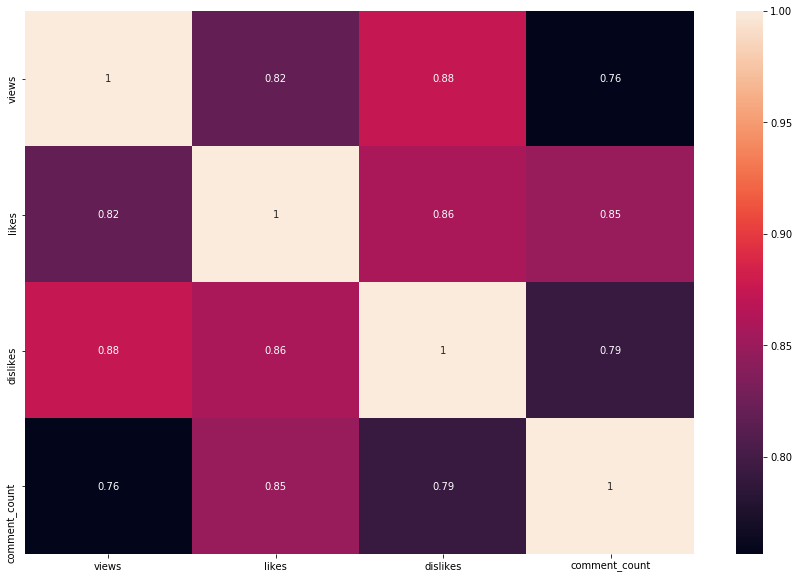

In [37]:
plt.figure(figsize = (15,10))
df.describe()
sns.heatmap(df[["views", "likes","dislikes","comment_count"]].corr(), annot=True)
plt.show()

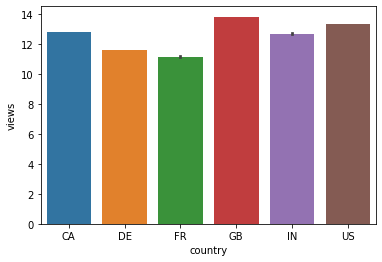

In [8]:
sns.barplot(x=df['country'],y=df['views'])

country
CA    40881
DE    40840
FR    40724
GB    38916
IN    37352
US    40949
Name: title, dtype: int64

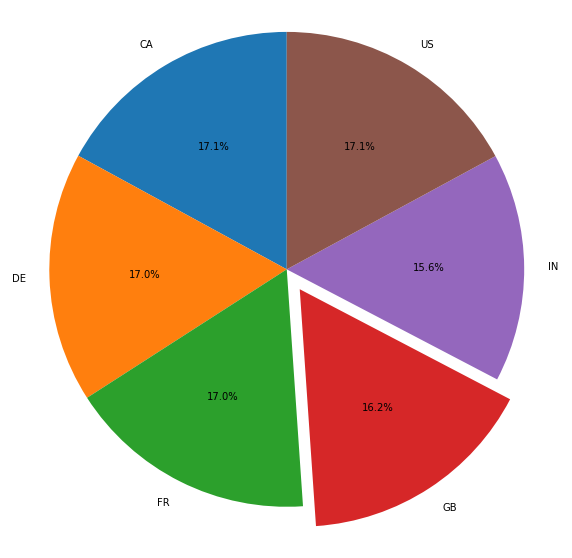

In [8]:
labels = df.groupby(['country']).count().index
sizes = df.groupby(['country']).count()['title']
explode = (0, 0, 0, 0.1, 0, 0)
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, explode=explode, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sizes

In [98]:
df[df['comment_count']=='-inf']

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country


In [11]:
def view_bar(x,y,title):
    plt.figure(figsize = (13,11))
    sns.barplot(x = x, y = y)
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.show()

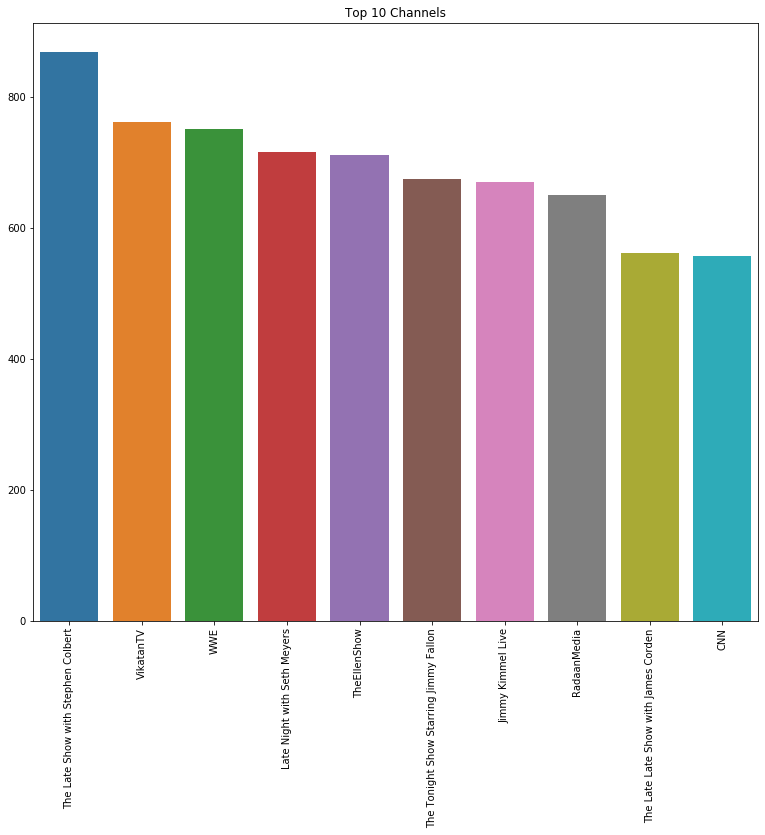

In [12]:
x = df.channel_title.value_counts().head(10).index
y = df.channel_title.value_counts().head(10).values
title = "Top 10 Channels"
view_bar(x,y,title)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48177 missing from c

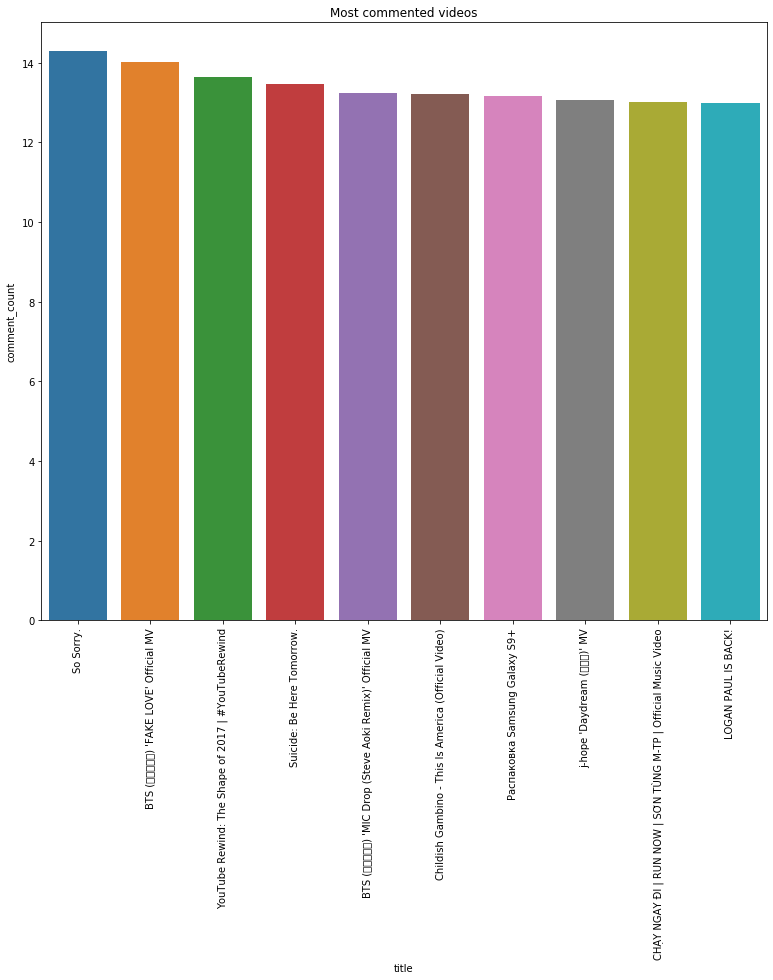

In [13]:
sort_by_comment = df.sort_values(by ="comment_count" , ascending = False).drop_duplicates('title', keep = 'first')
x = sort_by_comment['title'].head(10)
y = sort_by_comment['comment_count'].head(10)
title = "Most commented videos"
view_bar(x,y,title)

In [9]:
df['comment_count'].value_counts()

0.000000     6037
5.308268      803
0.693147      750
1.098612      726
1.386294      722
1.609438      719
1.791759      713
2.079442      688
2.197225      660
1.945910      642
2.397895      633
2.708050      625
2.639057      617
2.484907      605
2.302585      588
2.944439      584
2.890372      571
2.772589      559
2.833213      557
2.564949      530
2.995732      526
3.044522      504
3.218876      494
3.091042      493
3.178054      489
3.295837      487
3.258097      486
3.135494      476
3.332205      457
3.433987      444
             ... 
11.157022       1
10.962718       1
10.517997       1
9.968760        1
11.350030       1
10.725380       1
9.521568        1
12.374921       1
9.431402        1
9.316051        1
10.289056       1
10.088057       1
10.867844       1
9.904787        1
10.867082       1
11.323156       1
9.755973        1
11.832477       1
10.620327       1
9.972734        1
10.502077       1
9.893387        1
9.997570        1
10.311782       1
9.389992  

In [91]:
df['comment_count']= df['comment_count'].round(decimals=0).astype(object)

In [92]:
df['comment_count'].replace(to_replace ="-inf", 
                 value =0.0) 

0         12.0
1          9.0
2          9.0
3         10.0
4         11.0
5          9.0
6         10.0
7         10.0
8         11.0
9          7.0
10        10.0
11         8.0
12         5.0
13         9.0
14         9.0
15         8.0
16         9.0
17         6.0
18         6.0
19         7.0
20         8.0
21         8.0
22         8.0
23        11.0
24         8.0
25         8.0
26         8.0
27         8.0
28         7.0
29         7.0
          ... 
239632     7.0
239633    10.0
239634     7.0
239635     6.0
239636    10.0
239637     9.0
239638    11.0
239639     9.0
239640     9.0
239641     8.0
239642     7.0
239643     8.0
239644     9.0
239645     7.0
239646     8.0
239647     9.0
239648    10.0
239649     9.0
239650    10.0
239651    11.0
239652    10.0
239653     8.0
239654     7.0
239655    11.0
239656    11.0
239657     8.0
239658     8.0
239659     8.0
239660     9.0
239661    12.0
Name: comment_count, Length: 239662, dtype: float64

In [132]:
df['comment_count'].value_counts()

0.000000     6037
5.308268      803
0.693147      750
1.098612      726
1.386294      722
1.609438      719
1.791759      713
2.079442      688
2.197225      660
1.945910      642
2.397895      633
2.708050      625
2.639057      617
2.484907      605
2.302585      588
2.944439      584
2.890372      571
2.772589      559
2.833213      557
2.564949      530
2.995732      526
3.044522      504
3.218876      494
3.091042      493
3.178054      489
3.295837      487
3.258097      486
3.135494      476
3.332205      457
3.433987      444
             ... 
9.184920        1
9.840548        1
9.434044        1
10.733654       1
12.839133       1
9.336444        1
9.825039        1
10.389457       1
10.011175       1
12.595879       1
9.437635        1
8.894122        1
12.104710       1
9.793896        1
9.779680        1
10.816071       1
8.931948        1
10.205442       1
9.901285        1
12.318566       1
9.598524        1
8.740497        1
10.664644       1
9.211640        1
10.295496 

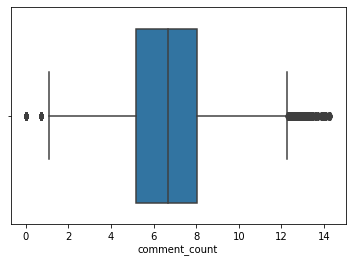

In [10]:
sns.boxplot(df['comment_count'])

In [11]:
sort_by_comment = df.sort_values(by ="views" , ascending = False).drop_duplicates('channel_title', keep = 'first')
x = sort_by_comment['channel_title'].head(10)
y = sort_by_comment['views'].head(10)
title = "Most viewed videos"
view_bar(x,y,title)

NameError: name 'view_bar' is not defined

In [7]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

In [8]:
# Encode labels in column 'comments_disabled'. 
df['comments_disabled']= label_encoder.fit_transform(df['comments_disabled']) 

In [9]:
df['comments_disabled'].unique() 

array([0, 1], dtype=int64)

In [10]:
df['comments_disabled'].value_counts()

0    234626
1      5036
Name: comments_disabled, dtype: int64

In [11]:
# Encode labels in column 'ratings_disabled'. 
df['ratings_disabled']= label_encoder.fit_transform(df['ratings_disabled']) 

In [12]:
df['ratings_disabled'].unique()

array([0, 1], dtype=int64)

In [13]:
df['ratings_disabled'].value_counts()

0    236785
1      2877
Name: ratings_disabled, dtype: int64

In [14]:
# Encode labels in column 'video_error_or_removed'. 
df['video_error_or_removed']= label_encoder.fit_transform(df['video_error_or_removed']) 


In [15]:
df['video_error_or_removed'].value_counts()

0    239496
1       166
Name: video_error_or_removed, dtype: int64

In [16]:
# Encode labels in column 'country'. 
df['country']= label_encoder.fit_transform(df['country']) 

In [17]:
df['country'].value_counts()

5    40949
0    40881
1    40840
2    40724
3    38916
4    37352
Name: country, dtype: int64

In [43]:
import datetime

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239662 entries, 0 to 239661
Data columns (total 17 columns):
video_id                  239662 non-null object
trending_year             239662 non-null int64
trending_month            239662 non-null int64
trending_date.1           239662 non-null int64
title                     239662 non-null object
channel_title             239662 non-null object
category_id               239662 non-null int64
publish_time              239662 non-null object
views                     239662 non-null float64
likes                     239662 non-null float64
dislikes                  239662 non-null float64
comment_count             239662 non-null float64
comments_disabled         239662 non-null int64
ratings_disabled          239662 non-null int64
video_error_or_removed    239662 non-null int64
description               239662 non-null float64
country                   239662 non-null int32
dtypes: float64(5), int32(1), int64(7), object(4)
memory us

In [16]:
df['trending_date']=pd.to_datetime(df["trending_date"], format='%y.%d.%m').dt.date
df

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,16.658009,13.576525,10.678698,11.743108,False,False,False,6.388561,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,13.830056,11.758183,7.431892,9.475086,False,False,False,6.558198,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,14.975981,11.891608,8.582981,9.009692,False,False,False,7.071573,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,14.555460,11.792374,7.595890,9.771041,False,False,False,6.456770,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,17.327761,14.306622,9.956222,11.351206,False,False,False,7.131699,CA
5,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,14.085309,11.549797,8.436850,9.404590,False,False,False,6.804615,CA
6,_uM5kFfkhB8,2017-11-14,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,14.910097,12.141347,9.195328,10.189794,False,False,False,7.837160,CA
7,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,13.525659,10.960149,7.995644,9.677841,False,False,False,7.252054,CA
8,JzCsM1vtn78,2017-11-14,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,15.314595,12.587375,8.324579,10.502104,False,False,False,6.618739,CA
9,43sm-QwLcx4,2017-11-14,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,13.132634,8.327484,6.884487,7.303170,False,False,False,4.330733,CA


In [117]:
df.head()

,video_id,trending_date,trending_year,trending_month,trending_date.1,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,17,14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,16.658009,13.576525,10.678698,11.743108,0,0,0,6.388561,0
1,0dBIkQ4Mz1M,17.14.11,17,14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,13.830056,11.758183,7.431892,9.475086,0,0,0,6.558198,0
2,5qpjK5DgCt4,17.14.11,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,14.975981,11.891608,8.582981,9.009692,0,0,0,7.071573,0
3,d380meD0W0M,17.14.11,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,14.555460,11.792374,7.595890,9.771041,0,0,0,6.456770,0
4,2Vv-BfVoq4g,17.14.11,17,14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,17.327761,14.306622,9.956222,11.351206,0,0,0,7.131699,0


In [18]:
fd=df.copy()

In [19]:
fd.head()

,video_id,trending_year,trending_month,trending_date.1,title,channel_title,category_id,Year,Month,Date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17,14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0,6.388561,0
1,0dBIkQ4Mz1M,17,14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17,11,10,13.830056,11.758183,7.431892,9.475086,0,0,0,6.558198,0
2,5qpjK5DgCt4,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,17,11,10,14.975981,11.891608,8.582981,9.009692,0,0,0,7.071573,0
3,d380meD0W0M,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,17,11,10,14.555460,11.792374,7.595890,9.771041,0,0,0,6.456770,0
4,2Vv-BfVoq4g,17,14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,17,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0,7.131699,0


In [20]:
fd['video_error_or_removed'].value_counts()

0    239496
1       166
Name: video_error_or_removed, dtype: int64

In [46]:
fd.columns

Index(['video_id', 'trending_year', 'trending_month', 'trending_date.1',
       'title', 'channel_title', 'category_id', 'Year', 'Month', 'Date',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'country'],
      dtype='object')

In [25]:
fd.shape

(239662, 17)

In [26]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239662 entries, 0 to 239661
Data columns (total 17 columns):
video_id                  239662 non-null object
trending_year             239662 non-null int64
trending_month            239662 non-null int64
trending_date.1           239662 non-null int64
title                     239662 non-null object
channel_title             239662 non-null object
category_id               239662 non-null int64
publish_time              239662 non-null object
views                     239662 non-null float64
likes                     239662 non-null float64
dislikes                  239662 non-null float64
comment_count             239662 non-null float64
comments_disabled         239662 non-null int64
ratings_disabled          239662 non-null int64
video_error_or_removed    239662 non-null int64
description               239662 non-null float64
country                   239662 non-null int32
dtypes: float64(5), int32(1), int64(7), object(4)
memory us

In [20]:
fd=fd.drop(['video_id','title','channel_title','description'],axis=1)

In [21]:
fd.head()

,trending_year,trending_month,trending_date.1,category_id,Year,Month,Date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country
0,17,14,11,10,17,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0,0
1,17,14,11,23,17,11,10,13.830056,11.758183,7.431892,9.475086,0,0,0,0
2,17,14,11,23,17,11,10,14.975981,11.891608,8.582981,9.009692,0,0,0,0
3,17,14,11,24,17,11,10,14.555460,11.792374,7.595890,9.771041,0,0,0,0
4,17,14,11,10,17,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0,0


In [23]:
from scipy.stats import ttest_ind
ttest_ind(df['trending_year'],df['views'])

Ttest_indResult(statistic=1262.1061816758959, pvalue=0.0)

In [24]:
from scipy.stats import ttest_ind
ttest_ind(df['trending_month'],df['views'])

Ttest_indResult(statistic=178.46126429543384, pvalue=0.0)

In [25]:
from scipy.stats import ttest_ind
ttest_ind(df['category_id'],df['views'])

Ttest_indResult(statistic=483.1902632024654, pvalue=0.0)

In [26]:
from scipy.stats import ttest_ind
for i in numerical:
    df1=df.groupby('trending_year').get_group(17)
    df2=df.groupby('trending_year').get_group(18)
    pvalue=ttest_ind(df1[i],df2[i])[1]
    if pvalue>0.05:

SyntaxError: unexpected EOF while parsing (<ipython-input-26-f491d218beb5>, line 6)

In [27]:
df1=df.groupby('trending_year').get_group(17)
df2=df.groupby('trending_year').get_group(18)
pvalue=ttest_ind(df1['views'],df2['views'])[1]

In [55]:
pvalue

0.0

In [28]:
d1=fd.copy()

In [57]:
d1.head()

,trending_year,trending_month,trending_date.1,category_id,Year,Month,Date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country
0,17,14,11,10,17,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0,0
1,17,14,11,23,17,11,10,13.830056,11.758183,7.431892,9.475086,0,0,0,0
2,17,14,11,23,17,11,10,14.975981,11.891608,8.582981,9.009692,0,0,0,0
3,17,14,11,24,17,11,10,14.555460,11.792374,7.595890,9.771041,0,0,0,0
4,17,14,11,10,17,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0,0


In [29]:
fd['country'].value_counts()

5    40949
0    40881
1    40840
2    40724
3    38916
4    37352
Name: country, dtype: int64

In [43]:
df['comment_count'].value_counts()

0.000000     6037
5.308268      803
0.693147      750
1.098612      726
1.386294      722
1.609438      719
1.791759      713
2.079442      688
2.197225      660
1.945910      642
2.397895      633
2.708050      625
2.639057      617
2.484907      605
2.302585      588
2.944439      584
2.890372      571
2.772589      559
2.833213      557
2.564949      530
2.995732      526
3.044522      504
3.218876      494
3.091042      493
3.178054      489
3.295837      487
3.258097      486
3.135494      476
3.332205      457
3.433987      444
             ... 
9.184920        1
9.840548        1
9.434044        1
10.733654       1
12.839133       1
9.336444        1
9.825039        1
10.389457       1
10.011175       1
12.595879       1
9.437635        1
8.894122        1
12.104710       1
9.793896        1
9.779680        1
10.816071       1
8.931948        1
10.205442       1
9.901285        1
12.318566       1
9.598524        1
8.740497        1
10.664644       1
9.211640        1
10.295496 

In [131]:
fd.head()

,trending_date,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country
0,17.14.11,17,14,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0,0
1,17.14.11,17,14,11,23,13.830056,11.758183,7.431892,9.475086,0,0,0,0
2,17.14.11,17,14,11,23,14.975981,11.891608,8.582981,9.009692,0,0,0,0
3,17.14.11,17,14,11,24,14.555460,11.792374,7.595890,9.771041,0,0,0,0
4,17.14.11,17,14,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0,0


In [132]:
fd=fd.drop('trending_date',axis=1)

In [30]:
y=fd['views']
X=fd.drop('views',axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1)

XG Boost

In [32]:
import xgboost

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:33:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
Xc = sm.add_constant(X)
lin_reg = sm.OLS(y,Xc).fit()
lin_reg.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.234e+05
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:37:36   Log-Likelihood:            -2.7519e+05
No. Observations:              239662   AIC:                         5.504e+05
Df Residuals:                  239650   BIC:                         5.505e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
trending_year              0.3418      0.010     33.401      0.000       0.322       0.362
trending_month             0.0010      0.000      5.539      0.000       0.001       0.001
trending_date.1            0.0314      0.001     28.017      0.000       0.029       0.034
category_id               -0.0108      0.000    -49.055      0.000      -0.011      -0.010
Year                       0.0172      0.006      2.762      0.006       0.005       0.029
Month                      0.0111      0.004      2.762      0.006       0.003       0.019
Date                       0.0101      0.004      2.762      0.006       0.003       0.017
likes                      0.3613      0.002    204.373      0.000       0.358       0.365
dislikes                   0.5708      0.002    370.336      0.000       0.568       0.574
comment_count             -0.0740      0.002    -40.089      0.000      -0.078      -0.070
comments_disabled         -0.2561      0.016    -16.448      0.000      -0.287      -0.226
ratings_disabled           5.1232      0.020    260.228      0.000       5.085       5.162
video_error_or_removed     0.1700      0.059      2.868      0.004       0.054       0.286
country                    0.0429      0.001     45.774      0.000       0.041       0.045
==============================================================================
Omnibus:                    15814.296   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76483.489
Skew:                           0.078   Prob(JB):                         0.00
Kurtosis:                       5.763   Cond. No.                     1.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

l1=LinearRegression()
l1.fit(x_train,y_train)
y_pred_org=l1.predict(x_test)
y_pred_org

from sklearn import metrics
    
trainscore=l1.score(x_train,y_train)
testscore=l1.score(x_test,y_test)

mae=metrics.mean_absolute_error(y_test,y_pred_org)
mse=metrics.mean_squared_error(y_test,y_pred_org)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

print(f'r2 score for train {trainscore}')
print(f'r2 score for test {testscore}')


0.5869862579103974
0.5859476273380875
0.7654721597406973
r2 score for train 0.8508254515951721
r2 score for test 0.8478744513423493


In [62]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

ValueError: Incorrect number of features. Got 3 features, expected 11

NameError: name 'y_predicted' is not defined

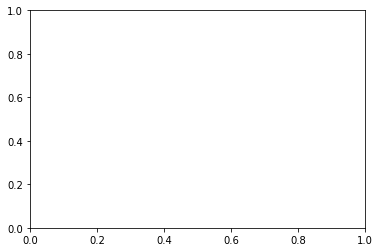

In [40]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [103]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [106]:
trainscore=regressor.score(X_train,y_train)
testscore=regressor.score(X_test,y_test)

In [107]:
print(trainscore)

1.0


In [108]:
print(testscore)

1.0


In [104]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = regressor.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = regressor.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  1.0
Mean squared error: 0.00
Test Variance score: 1.00


In [66]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
Ac1 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
Ac2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
Ac3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
Ac4 = metrics.accuracy_score(y_pred,y_test)

OSError: [WinError -529697949] Windows Error 0xe06d7363

In [67]:
d1.head()

,trending_date,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country
0,17.14.11,17,14,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0,0
1,17.14.11,17,14,11,23,13.830056,11.758183,7.431892,9.475086,0,0,0,0
2,17.14.11,17,14,11,23,14.975981,11.891608,8.582981,9.009692,0,0,0,0
3,17.14.11,17,14,11,24,14.555460,11.792374,7.595890,9.771041,0,0,0,0
4,17.14.11,17,14,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0,0


In [68]:
d1=d1.drop(['country'],axis=1)


In [69]:
fd['country'].value_counts()

5    40949
0    40881
1    40840
2    40724
3    38916
4    37352
Name: country, dtype: int64

In [70]:
d1.head()

,trending_date,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,17,14,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0
1,17.14.11,17,14,11,23,13.830056,11.758183,7.431892,9.475086,0,0,0
2,17.14.11,17,14,11,23,14.975981,11.891608,8.582981,9.009692,0,0,0
3,17.14.11,17,14,11,24,14.555460,11.792374,7.595890,9.771041,0,0,0
4,17.14.11,17,14,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0


In [75]:
d1=d1.drop(['trending_date'],axis=1)


In [71]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize

In [72]:
#clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
#metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report
from sklearn import metrics
#pca
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
#warnings
import warnings
warnings.filterwarnings("ignore")

In [76]:
sc=StandardScaler()

X_scaled=sc.fit_transform(d1)


In [77]:
X_scaled

array([[-1.7893767 , -0.21150472,  1.49500078, ..., -0.14650579,
        -0.11022823, -0.02632721],
       [-1.7893767 , -0.21150472,  1.49500078, ..., -0.14650579,
        -0.11022823, -0.02632721],
       [-1.7893767 , -0.21150472,  1.49500078, ..., -0.14650579,
        -0.11022823, -0.02632721],
       ...,
       [ 0.55885382, -0.21150472,  0.19595361, ..., -0.14650579,
        -0.11022823, -0.02632721],
       [ 0.55885382, -0.21150472,  0.19595361, ..., -0.14650579,
        -0.11022823, -0.02632721],
       [ 0.55885382, -0.21150472,  0.19595361, ..., -0.14650579,
        -0.11022823, -0.02632721]])

In [78]:
cluster_range=range(1,20)
cluster_errors=[]

In [79]:
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=0)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [81]:
cluster_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
cluster_df[0:10]

,num_clusters,cluster_errors
0,1,2.636282e+06
1,2,2.093711e+06
2,3,1.759904e+06
3,4,1.458069e+06
4,5,1.218793e+06
5,6,1.088927e+06
6,7,9.057397e+05
7,8,8.100972e+05
8,9,7.333913e+05
9,10,6.702721e+05


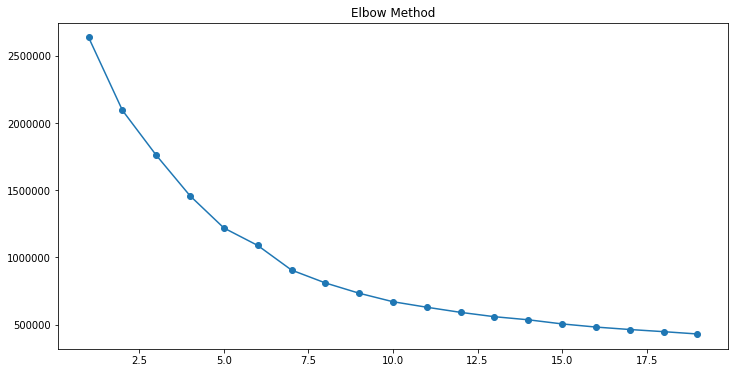

In [82]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_errors,marker="o")
plt.title('Elbow Method')
plt.show()

In [84]:
kmeans=KMeans(n_clusters=5).fit(d1)
centroids=kmeans.cluster_centers_

print('centroids :\n',centroids)

label=kmeans.labels_

centroids :
 [[1.78519962e+01 5.19105124e+00 4.71680747e+00 2.34238398e+01
  1.23010090e+01 8.27907455e+00 5.39497425e+00 6.22040635e+00
  2.61677220e-02 1.35037538e-02 7.72602832e-04]
 [1.78559028e+01 7.83205192e+00 4.81712963e+00 7.37293320e+00
  1.36411057e+01 9.95988812e+00 6.58376707e+00 7.50195201e+00
  9.42460317e-03 9.30059524e-03 1.73611111e-03]
 [1.76973815e+01 2.57115913e+01 5.58408082e+00 2.33969527e+01
  1.22770264e+01 8.25649293e+00 5.37614322e+00 6.21182992e+00
  2.30890037e-02 1.28960164e-02 2.26510827e-04]
 [1.77199262e+01 1.56092552e+01 5.52758423e+00 2.34122522e+01
  1.22877823e+01 8.28687810e+00 5.39092432e+00 6.21924977e+00
  2.29709522e-02 1.19468041e-02 2.54525787e-04]
 [1.77357992e+01 2.31372593e+01 5.31083548e+00 7.44273103e+00
  1.35622134e+01 9.89542604e+00 6.51372376e+00 7.43744492e+00
  1.03177264e-02 9.05129065e-03 1.75066115e-03]]


In [85]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,random_state=0)
model.fit(d1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [86]:
d2= d1.copy()
d2.head()

,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17,14,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0
1,17,14,11,23,13.830056,11.758183,7.431892,9.475086,0,0,0
2,17,14,11,23,14.975981,11.891608,8.582981,9.009692,0,0,0
3,17,14,11,24,14.555460,11.792374,7.595890,9.771041,0,0,0
4,17,14,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0


In [87]:
d2['clusters']=model.predict(d1)
d2.head()

,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,clusters
0,17,14,11,10,16.658009,13.576525,10.678698,11.743108,0,0,0,4
1,17,14,11,23,13.830056,11.758183,7.431892,9.475086,0,0,0,0
2,17,14,11,23,14.975981,11.891608,8.582981,9.009692,0,0,0,0
3,17,14,11,24,14.555460,11.792374,7.595890,9.771041,0,0,0,0
4,17,14,11,10,17.327761,14.306622,9.956222,11.351206,0,0,0,4


In [90]:
clust_prof = d2.groupby(['clusters'],as_index=False).mean()
clust_prof

,clusters,trending_year,trending_month,trending_date.1,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,17.719926,15.609255,5.527584,23.412252,12.287782,8.286878,5.390924,6.219250,0.022971,0.011947,0.000255
1,1,17.735799,23.137259,5.310835,7.442731,13.562213,9.895426,6.513724,7.437445,0.010318,0.009051,0.001751
2,2,17.851996,5.191051,4.716807,23.423840,12.301009,8.279075,5.394974,6.220406,0.026168,0.013504,0.000773
3,3,17.697382,25.711591,5.584081,23.396953,12.277026,8.256493,5.376143,6.211830,0.023089,0.012896,0.000227
4,4,17.855903,7.832052,4.817130,7.372933,13.641106,9.959888,6.583767,7.501952,0.009425,0.009301,0.001736


In [91]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# # PCA for getting the first 2 Principle components using K -Means

In [93]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pc = pca2.fit_transform(d2)
pc_df = pd.DataFrame(pc)
pc_df.head()

,0,1
0,-1.619567,-11.326123
1,-1.633185,2.414864
2,-1.636347,2.277569
3,-1.635414,3.313155
4,-1.620270,-11.367499


In [94]:
pca = pd.concat([pc_df,d2['clusters']],axis=1)
pca.columns = ['pc1','pc2','clusters']
print(pca.shape)
pca.head()

(239662, 3)


,pc1,pc2,clusters
0,-1.619567,-11.326123,4
1,-1.633185,2.414864,0
2,-1.636347,2.277569,0
3,-1.635414,3.313155,0
4,-1.620270,-11.367499,4


In [ ]:
pca.clusters.value_counts()

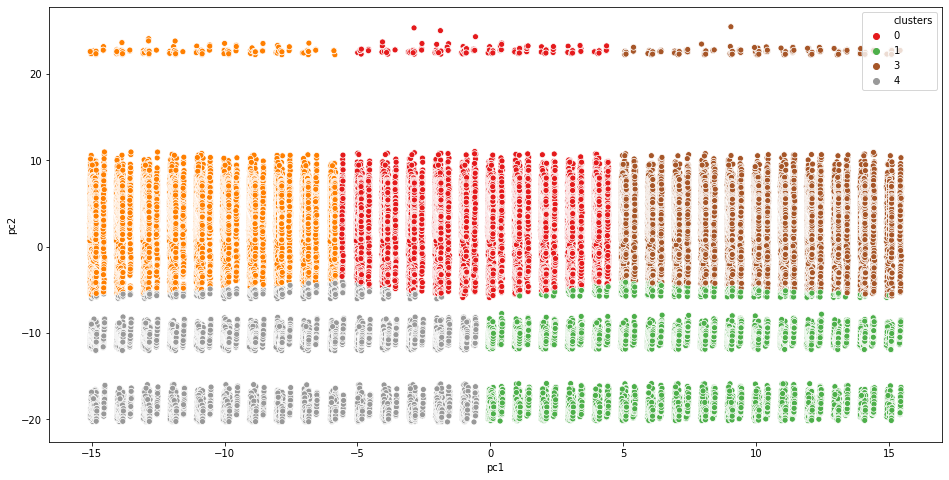

In [95]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='pc1', y='pc2', hue= 'clusters', data=pca,palette='Set1')
plt.show()

In [96]:
X = pca
y = pca['clusters'].values

In [97]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1)

In [98]:
# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
Ac1 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
Ac2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
Ac3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
Ac4 = metrics.accuracy_score(y_pred,y_test)

In [99]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(xgbMod.feature_importances_)
print(gbmMod.feature_importances_)

[0.19243407 0.         0.80756593]
[0.35092113 0.23260743 0.41647144]
[0.53072155 0.1518138  0.31746465]
[0.35037263 0.0611246  0.58850277]


In [100]:
# Compare accuracy of models
pd.DataFrame([['XG Boost',Ac1],['Gradient Boost',Ac2],
                             ['Decision Tree',Ac3],['Random Forest',Ac4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,XG Boost,0.999986
1,Gradient Boost,1.000000
2,Decision Tree,1.000000
3,Random Forest,0.998373


In [101]:
df.head()

,video_id,trending_date,trending_year,trending_month,trending_date.1,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,17,14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,16.658009,13.576525,10.678698,11.743108,0,0,0,6.388561,0
1,0dBIkQ4Mz1M,17.14.11,17,14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,13.830056,11.758183,7.431892,9.475086,0,0,0,6.558198,0
2,5qpjK5DgCt4,17.14.11,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,14.975981,11.891608,8.582981,9.009692,0,0,0,7.071573,0
3,d380meD0W0M,17.14.11,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,14.555460,11.792374,7.595890,9.771041,0,0,0,6.456770,0
4,2Vv-BfVoq4g,17.14.11,17,14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,17.327761,14.306622,9.956222,11.351206,0,0,0,7.131699,0
